In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [3]:
# Drop the Unwannted column the first one
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [5]:
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

<Axes: >

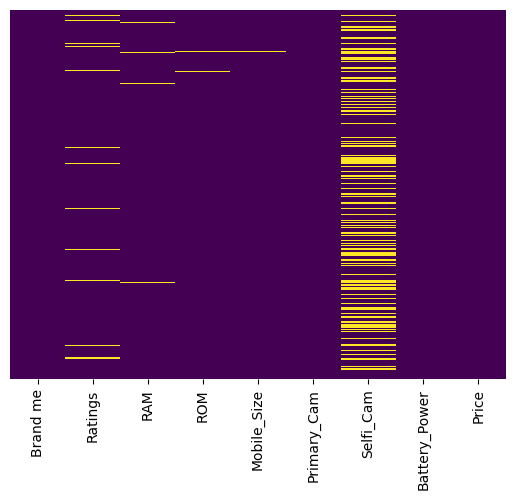

In [6]:
# Seeing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        805 non-null    float64
 2   RAM            829 non-null    float64
 3   ROM            832 non-null    float64
 4   Mobile_Size    834 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      567 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [9]:
# Calculate mean, mode, median, and other statistics
mean_price = df['Price'].mean()
mode_brand = df['Brand me'].mode()[0]
median_ratings = df['Ratings'].median()
percentile_25_rom = df['ROM'].quantile(0.25)
percentile_75_ram = df['RAM'].quantile(0.75)

In [10]:
print("Mean Price:", mean_price)
print("Mode Brand:", mode_brand)
print("Median Ratings:", median_ratings)
print("25th Percentile of ROM:", percentile_25_rom)
print("75th Percentile of RAM:", percentile_75_ram)

Mean Price: 18220.346889952154
Mode Brand: Kechaoda A27
Median Ratings: 4.1
25th Percentile of ROM: 32.0
75th Percentile of RAM: 6.0


In [11]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [12]:
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [13]:
# Dropping the Name columns
df.drop(['Brand me'],axis=1,inplace=True)

In [14]:
# We should handling these null or missing values
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [15]:
# Fill up the mean values of all the missing value columns into the dataset
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())
df['ROM'] = df['ROM'].fillna(df['ROM'].mean())
df['Mobile_Size'] = df['Mobile_Size'].fillna(df['Mobile_Size'].mean())
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean())

In [16]:
# After handling the all of the missing and null values from the dataset
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

<Axes: >

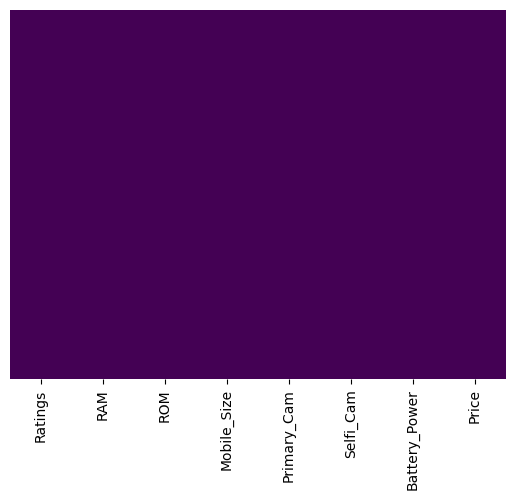

In [17]:
# We can able to see the there is no null values  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# Changing the Datatype
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [19]:
# Final dataset for build a model
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


In [20]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<Axes: >

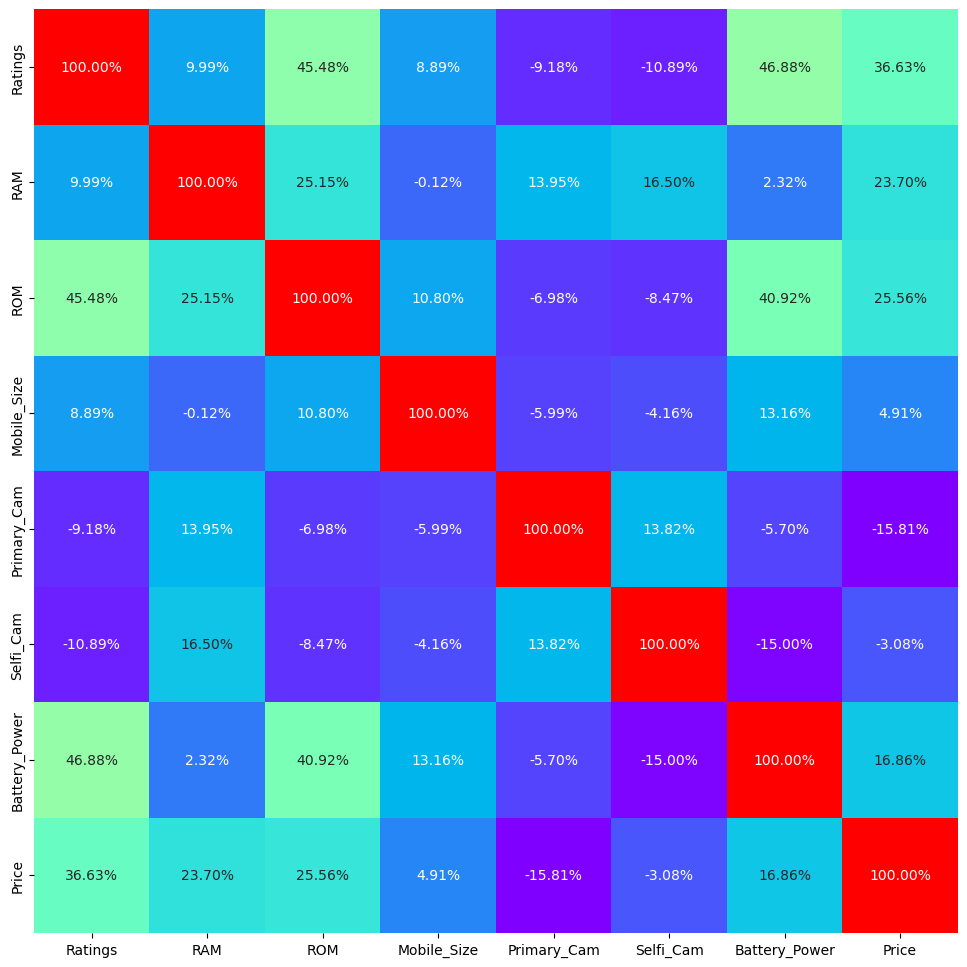

In [21]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='rainbow')

<Axes: xlabel='Ratings', ylabel='count'>

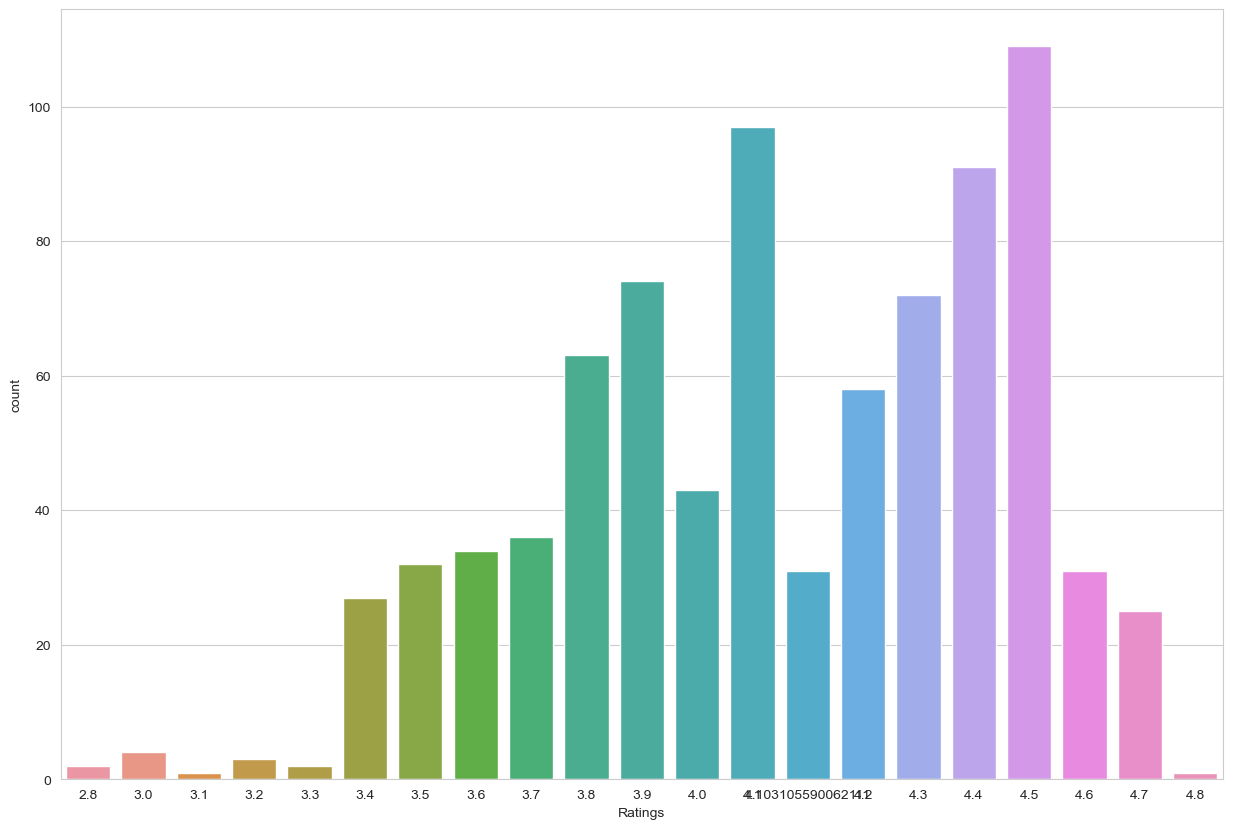

In [22]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

<Axes: xlabel='RAM', ylabel='count'>

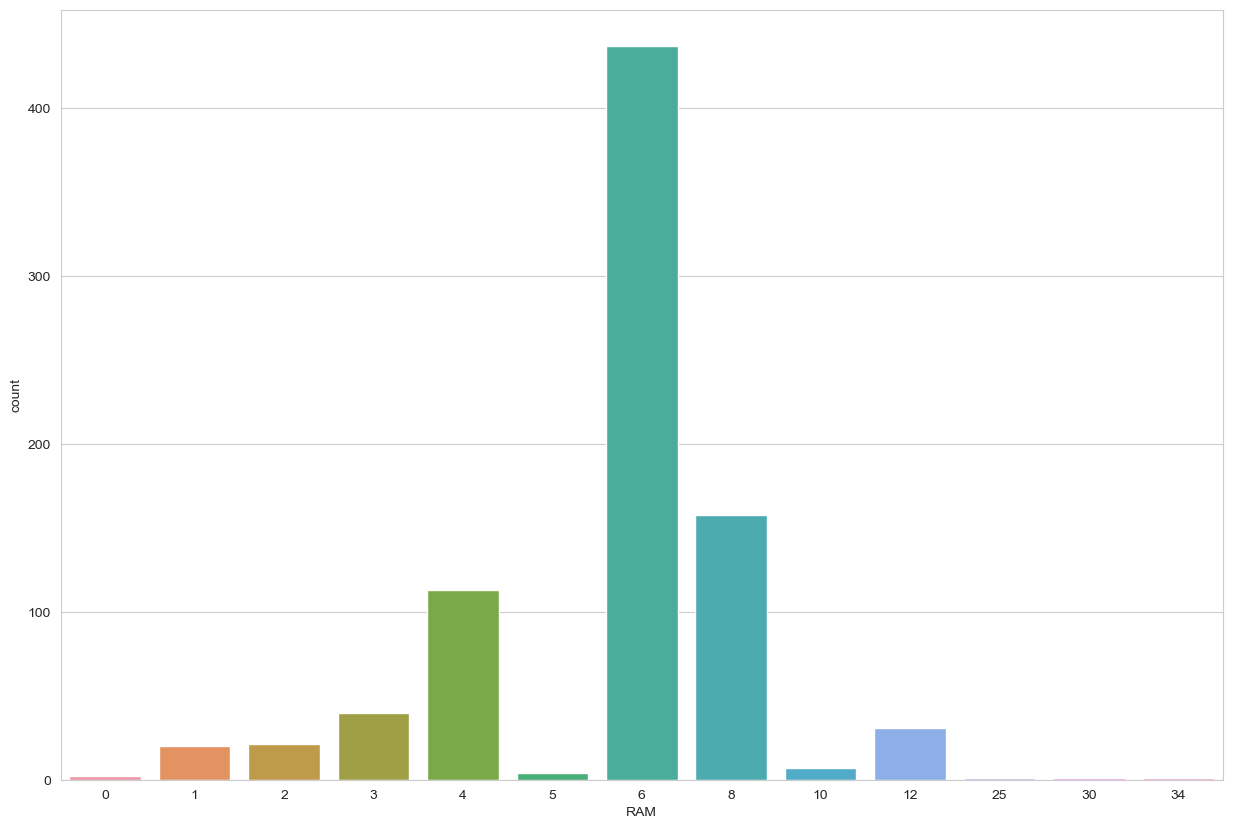

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

<Axes: xlabel='ROM', ylabel='count'>

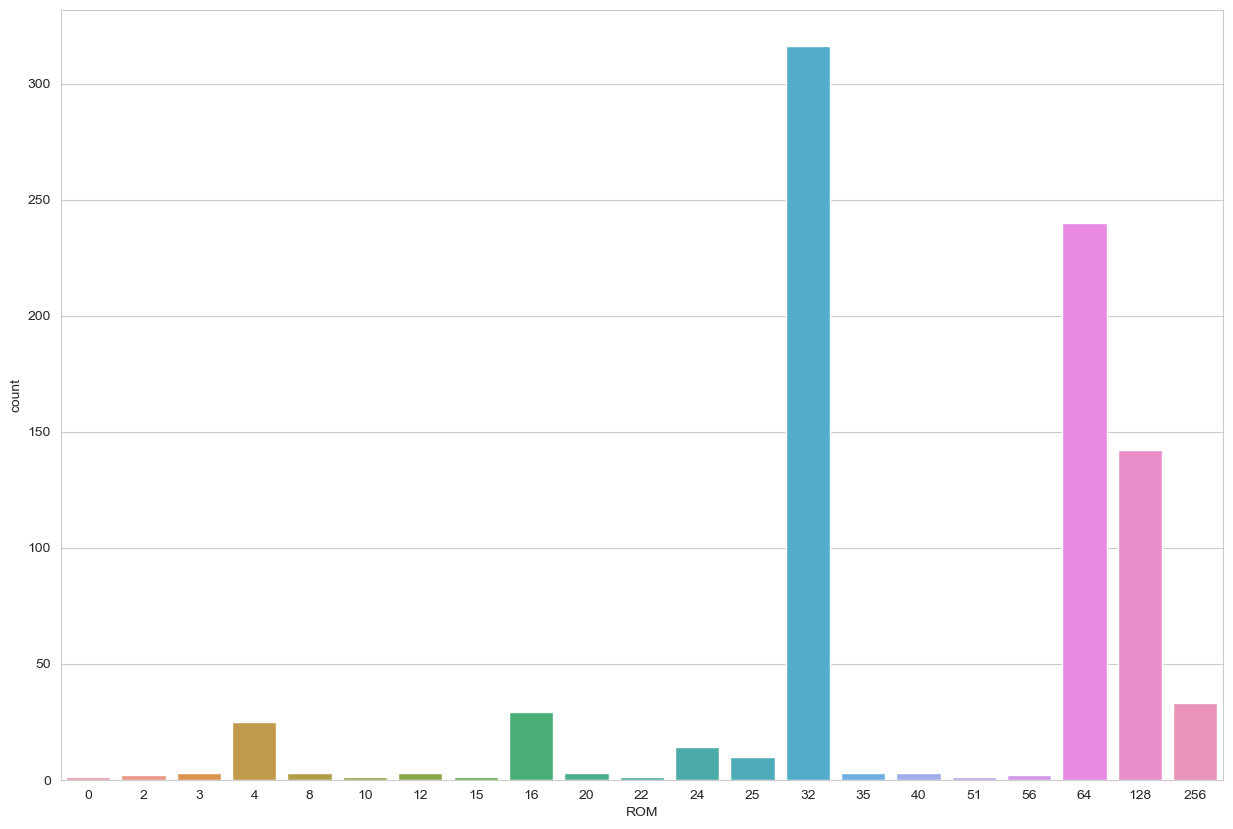

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)


<Axes: xlabel='Primary_Cam', ylabel='count'>

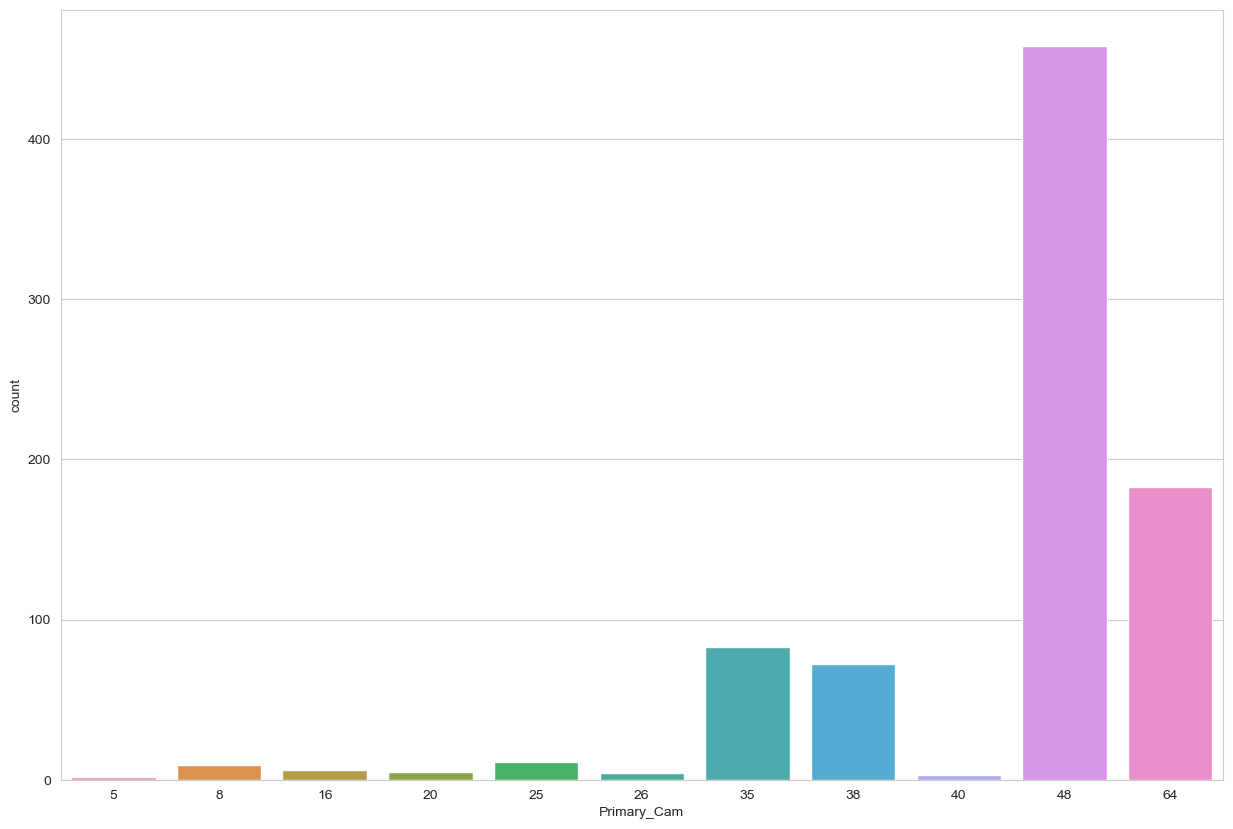

In [25]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Primary_Cam',data=df)

<Axes: xlabel='Selfi_Cam', ylabel='count'>

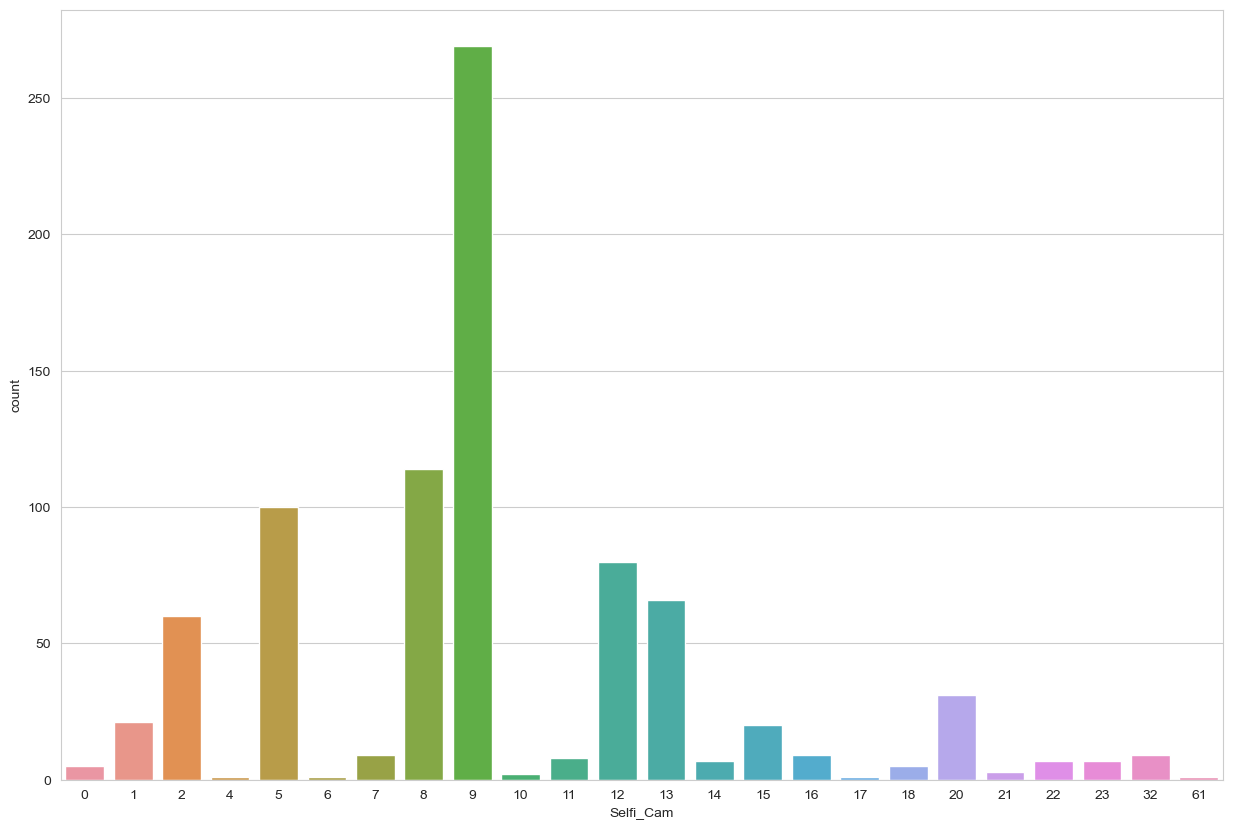

In [26]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

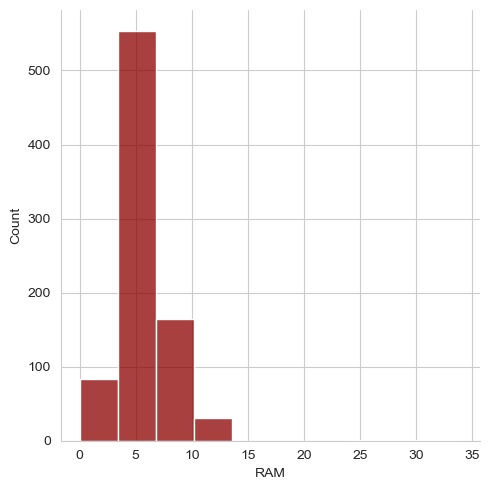

In [27]:
sns.displot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)

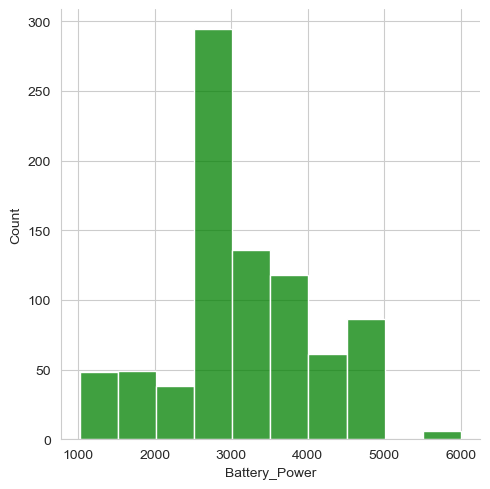

In [28]:
sns.displot(df['Battery_Power'].dropna(),kde=False,color='green',bins=10)

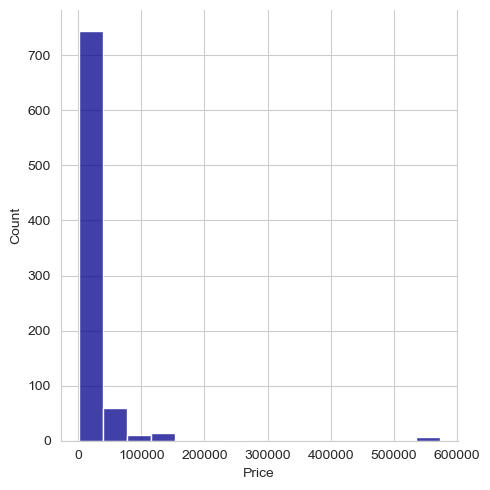

In [29]:
sns.displot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

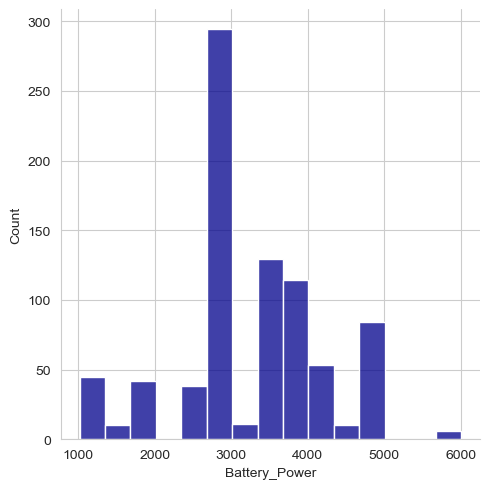

In [30]:
sns.displot(df['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 1000x1000 with 0 Axes>

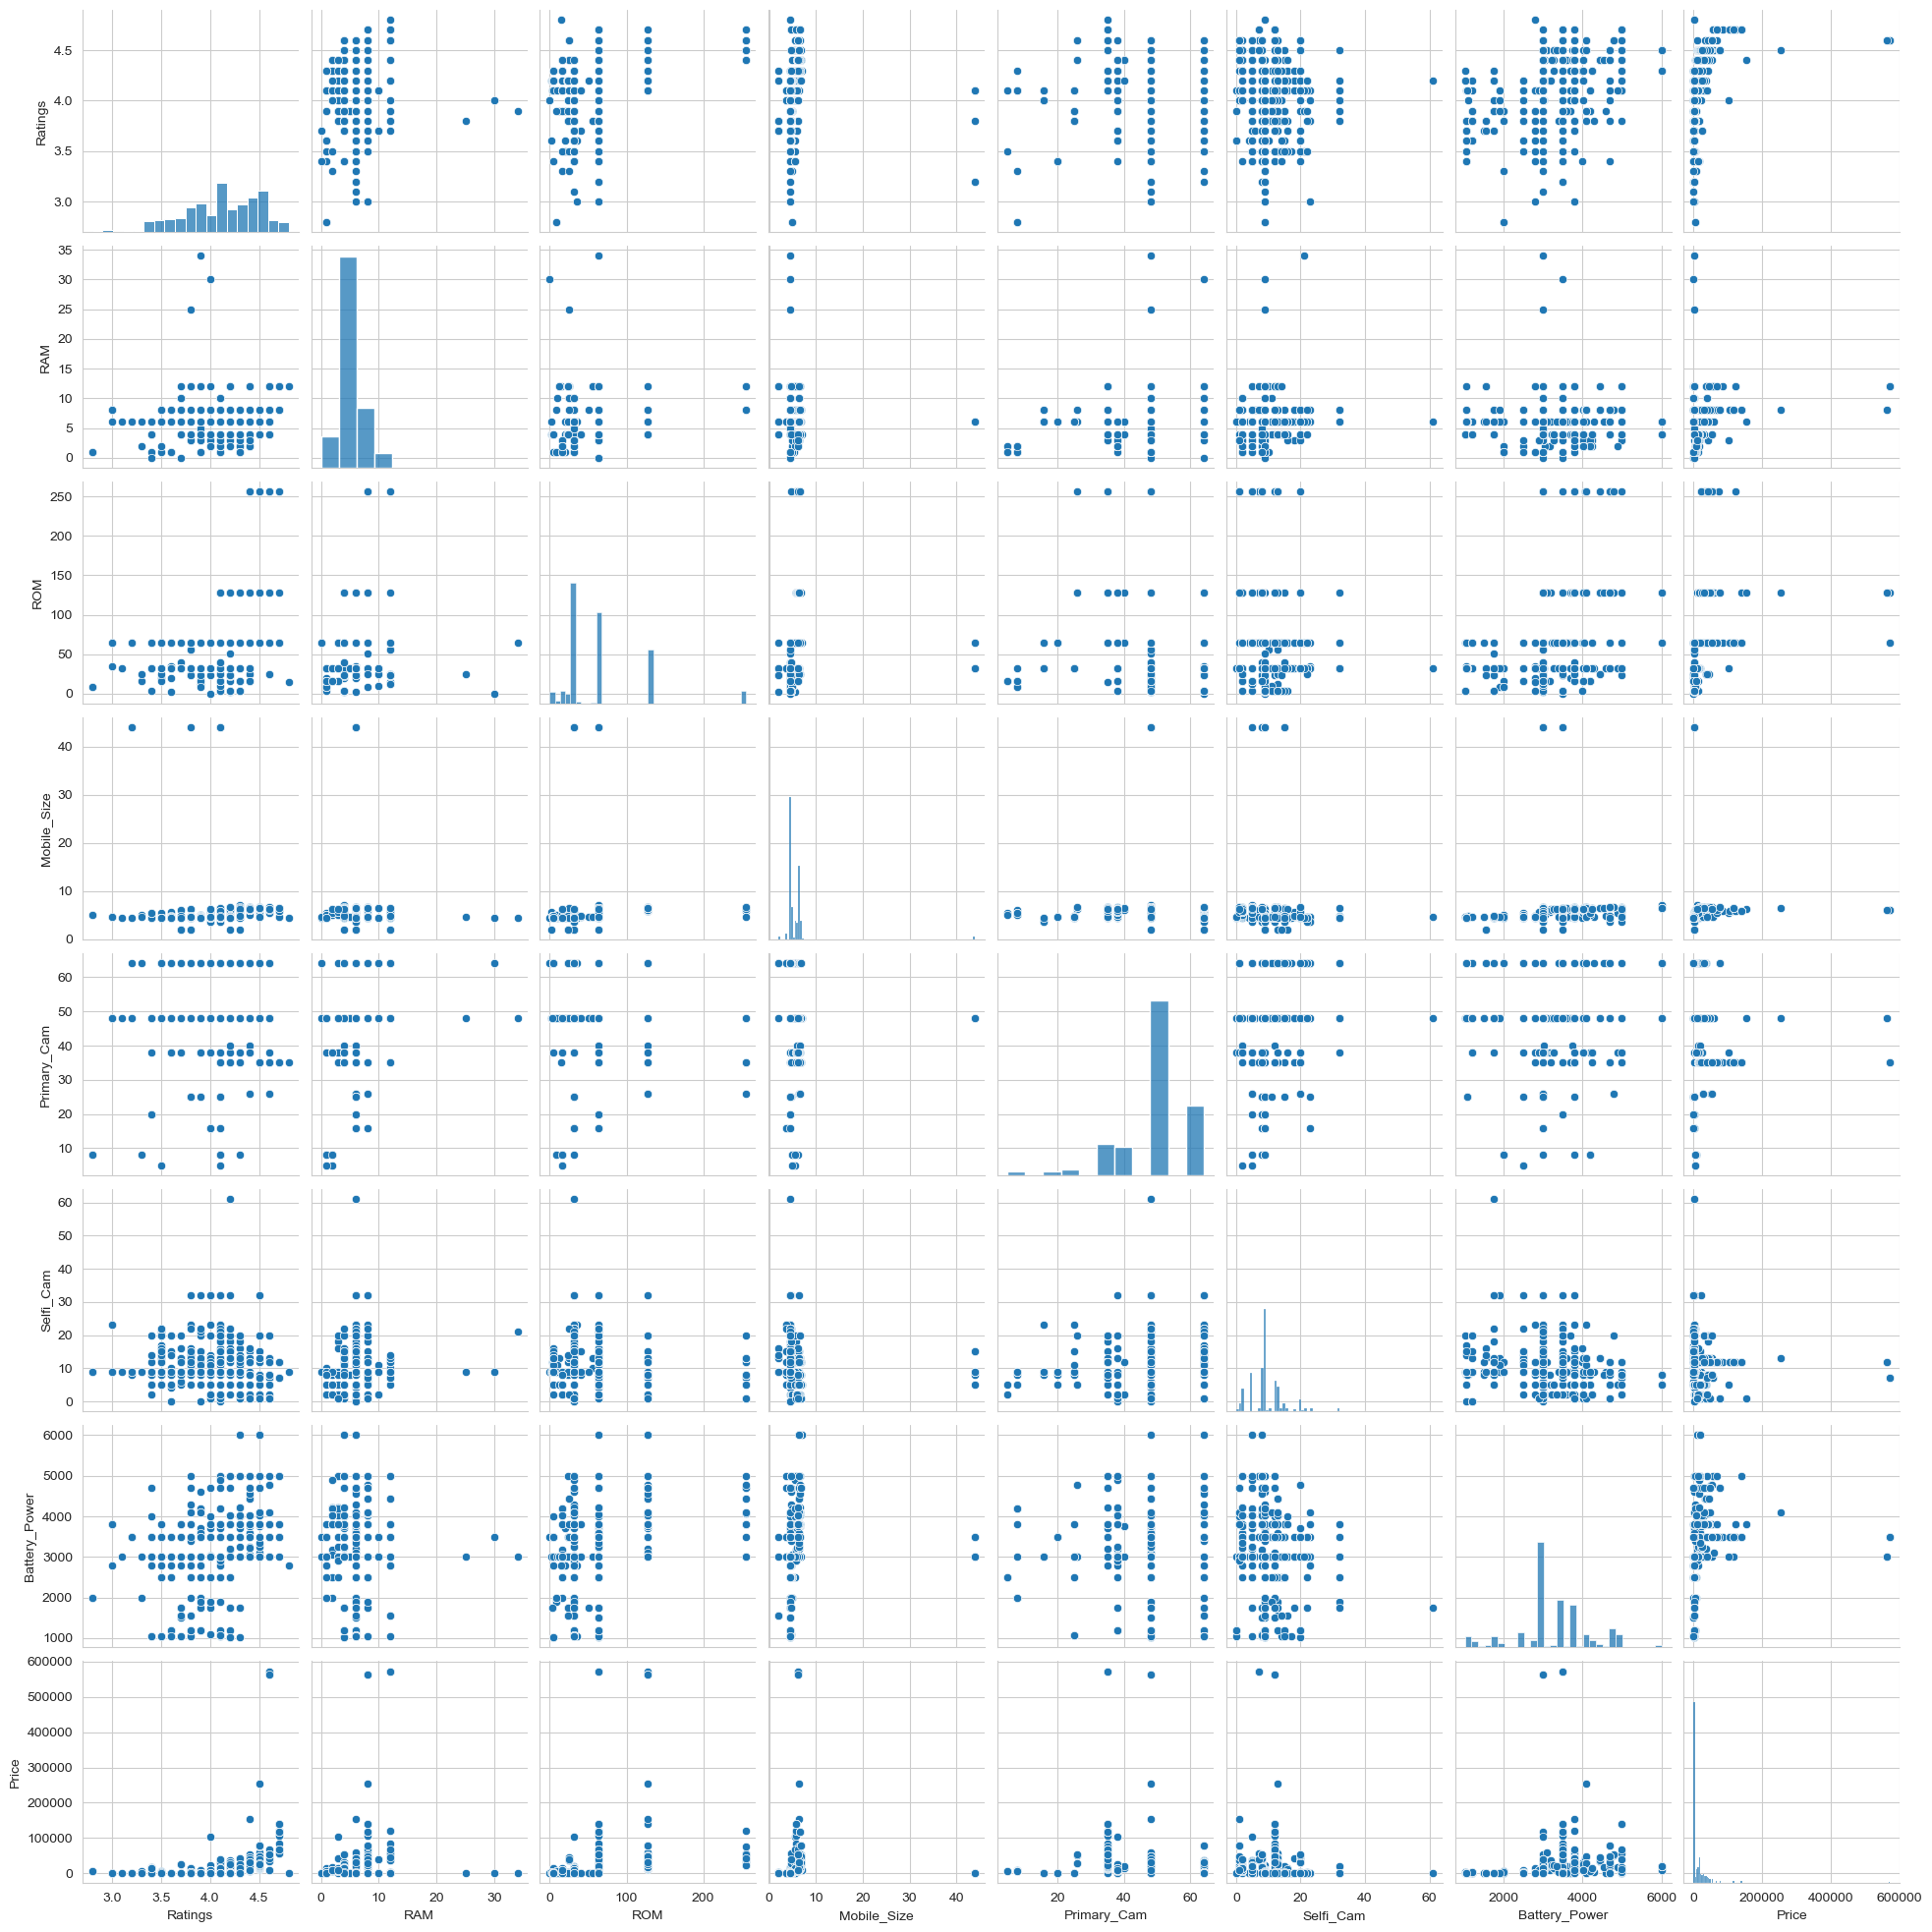

In [31]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

In [32]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Yarget column i.e price range 

In [34]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [36]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [37]:
featureScores

,Specs,Score
0,RAM,605.009453
1,ROM,31222.209834
2,Mobile_Size,874.471349
3,Primary_Cam,1465.379223
4,Selfi_Cam,1358.898574
5,Battery_Power,156629.116310


In [38]:
print(featureScores.nlargest(4,'Score'))  #print 5 best features

           Specs          Score
5  Battery_Power  156629.116310
1            ROM   31222.209834
3    Primary_Cam    1465.379223
4      Selfi_Cam    1358.898574


In [39]:
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\hp\AppData\Local\Temp\ipykernel_11448\45490098.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [40]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11631204 0.10228789 0.26113503 0.09579303 0.22187141 0.20260059]


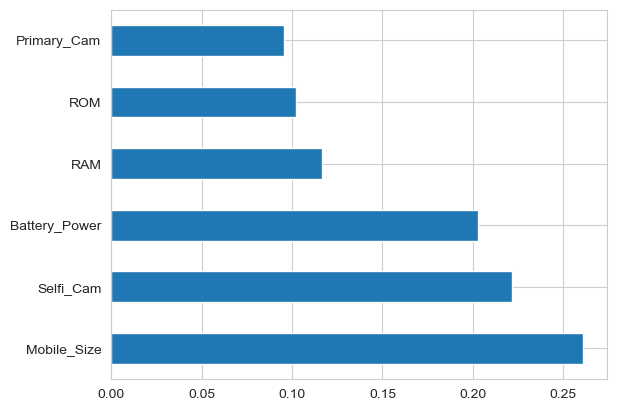

In [41]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [42]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Value Assigning
X = df.iloc[:, [6, 2, 4, 5, 1, 3]]
y = df.iloc[:, [-1]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)


In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_train = reg.predict(X_train)

# Training Score
training_score = reg.score(X_train, y_train)
print("Training Accuracy:", training_score * 100)

Training Accuracy: 13.447453391804565


In [49]:
y_pred_test = reg.predict(X_test)

# Testing Score
testing_score = reg.score(X_test, y_test)
print("Testing Accuracy:", testing_score * 100)

Testing Accuracy: 11.582895173205433


In [50]:
from sklearn.linear_model import Lasso

In [51]:
X = df.iloc[:, [6, 2, 4, 5, 1, 3]]
y = df.iloc[:, [-1]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [52]:
reg = Lasso()
reg.fit(X_train, y_train)


Lasso()

In [53]:
# Predicting on the training set
y_pred_train = reg.predict(X_train)

# Training Score
training_score = reg.score(X_train, y_train)
print("Training Accuracy:", training_score * 100)

# Predicting on the testing set
y_pred_test = reg.predict(X_test)

# Testing Score
testing_score = reg.score(X_test, y_test)
print("Testing Accuracy:", testing_score * 100)

Training Accuracy: 13.447453380710817
Testing Accuracy: 11.583285084358907


In [54]:
from sklearn.linear_model import BayesianRidge

In [55]:
reg = BayesianRidge()
reg.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [56]:
y_pred_train = reg.predict(X_train)

# Training Score
training_score = reg.score(X_train, y_train)
print("Training Accuracy:", training_score * 100)

# Predicting on the testing set
y_pred_test = reg.predict(X_test)

# Testing Score
testing_score = reg.score(X_test, y_test)
print("Testing Accuracy:", testing_score * 100)

Training Accuracy: 13.2607362075966
Testing Accuracy: 13.18005935198342


In [57]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_11448\4032883785.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


RandomForestRegressor()

In [58]:
y_pred = reg.predict(X_train)

In [59]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 95.82538181386204


In [60]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 93.39781430552574


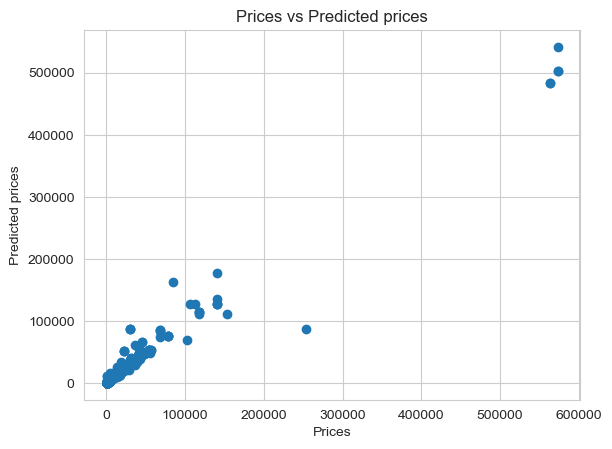

In [61]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [62]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([196168.52666667])

In [64]:
#support vector regressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [65]:
y_pred = reg.predict(X_train)

In [66]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 95.82538181386204


In [67]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 93.39781430552574


In [68]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([196168.52666667])

In [69]:
#gradientboostingregression
from sklearn.ensemble import GradientBoostingRegressor

# Value Assigning
X = df.iloc[:, [6, 2, 4, 5, 1, 3]]
y = df.iloc[:, [-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [70]:
# Initialize and fit the model
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)




C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [71]:
# Training Score
print("Training Accuracy:", reg.score(X_train, y_train) * 100)

# Testing Score
print("Testing Accuracy:", reg.score(X_test, y_test) * 100)

Training Accuracy: 91.22817230979612
Testing Accuracy: 93.04641188384448


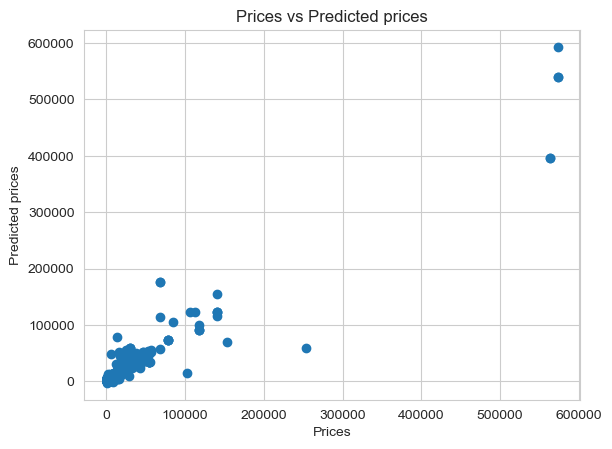

In [72]:
# Visualizing the differences between actual prices and predicted values
y_pred = reg.predict(X_train)
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [73]:
# Sample Prediction
sample_input = [[4.0,128.0,6.00,48,13.0,4000]]
predicted_price = reg.predict(sample_input)
print("Predicted Price:", predicted_price)

Predicted Price: [19309.74342724]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [74]:
#xgb  optimized version of gradient
import xgboost as xgb

# Value Assigning
X = df.iloc[:, [6, 2, 4, 5, 1, 3]]
y = df.iloc[:, [-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [75]:
# Initialize and fit the model
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
# Training Score
print("Training Accuracy:", reg.score(X_train, y_train) * 100)

Training Accuracy: 97.9679009833207


In [77]:
# Testing Score
print("Testing Accuracy:", reg.score(X_test, y_test) * 100)

Testing Accuracy: 96.45599497218001


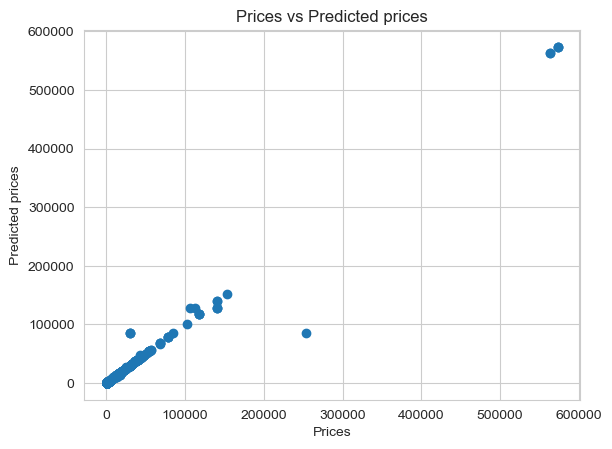

In [78]:
# Visualizing the differences between actual prices and predicted values
y_pred = reg.predict(X_train)
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [81]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Preprocess the dataset and split into features (X) and target variable (y)
X = df[['RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power']]
y = df['Price']

In [82]:
# Initialize the XGBoost model
model = xgb.XGBRegressor()


In [83]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)

In [84]:
# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

In [85]:
# Print the cross-validation results
print("Cross-Validation RMSE Scores:")
for i, score in enumerate(rmse_scores):
    print("Fold {}: {:.2f}".format(i+1, score))
print("Mean RMSE: {:.2f}".format(mean_rmse))
print("Standard Deviation of RMSE: {:.2f}".format(std_rmse))

Cross-Validation RMSE Scores:
Fold 1: 20505.00
Fold 2: 7726.22
Fold 3: 8200.46
Fold 4: 63657.80
Fold 5: 10316.71
Mean RMSE: 22081.24
Standard Deviation of RMSE: 21299.02


In [86]:
# Train the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [87]:
# Calculate the RMSE on the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [88]:
# Print the testing results
print("Testing RMSE: {:.2f}".format(test_rmse))

Testing RMSE: 8464.40


In [89]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd

In [90]:
# Define the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Bayesian Regression", BayesianRidge()),
    ("ElasticNet Regression", ElasticNet()),
    ("Random Forest", RandomForestRegressor()),
    ("SVR", SVR()),
    ("Gradient Boosting Regression", GradientBoostingRegressor()),
    ("XGBoost", xgb.XGBRegressor())
]

In [91]:
# Create an empty DataFrame to store the performance metrics
metrics_df = pd.DataFrame(columns=["Model", "Training RMSE", "Testing RMSE"])


In [92]:
# Iterate over the models
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the RMSE for training and testing data
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    # Append the performance metrics to the DataFrame
    metrics_df = metrics_df.append(
        {"Model": model_name, "Training RMSE": train_rmse, "Testing RMSE": test_rmse},
        ignore_index=True
    )

C:\Users\hp\AppData\Local\Temp\ipykernel_11448\545962401.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
C:\Users\hp\AppData\Local\Temp\ipykernel_11448\545962401.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
C:\Users\hp\AppData\Local\Temp\ipykernel_11448\545962401.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_114

In [93]:
print(metrics_df)

                          Model  Training RMSE  Testing RMSE
0             Linear Regression   51287.347357  42278.288899
1              Lasso Regression   51287.347360  42278.195677
2              Ridge Regression   51287.347510  42277.482433
3           Bayesian Regression   51342.637873  41894.691751
4         ElasticNet Regression   51299.776917  42071.163173
5                 Random Forest   10527.406991  10112.695614
6                           SVR   57634.295456  47519.912067
7  Gradient Boosting Regression   16327.337052  11853.686698
8                       XGBoost    7858.555868   8464.404740
